## Practical 6: Numeric Data

Easing into EDA with Pandas

This session is a tour-de-`pandas`; since this is Python’s equivalent of
the `tidyverse` meets `data.tables` it is fundamental to the data
science ecosystem and is probably one of the most-widely used libraries
in the language as a whole. I get [more than 286,000
questions](https://stackoverflow.com/questions/tagged/pandas) tagged
with pandas on StackOverflow.

This week we are also going to start looking more closely at the
**[InsideAirbnb](http://insideairbnb.com/)** data which forms the core
of the work that we do over the rest of the term. The focus of *this*
notebook is simple numeric data: no mapping or text data… yet… and
direct manipulation of data types, derivation of summary statistics, and
simple plotting.

We hope that you will be able to draw on the past few practical sessions
to develop a more intuitive understanding of how to interact with pandas
since it supports both a ‘dictionary-of-lists’ style of interaction
*and* a methods-based style of interaction with the ‘Data Frame’.

> **Important**
>
> Conceptually, this practical links together *all* of the preceding
> ones; you will find data structures, classes and methods, reading CSV
> files from a remote location, `numpy`, and more than you ever wanted
> to know about data types in Python. Making these connections will make
> the remainder of term much, much easier, so it might be worth
> **revising this practical** over Reading Week so make sure it all
> makes sense! That may include rewatching the lectures on
> [Data](https://jreades.github.io/fsds/sessions/week6.html#pre-recorded-lectures)
> and
> [Pandas](https://jreades.github.io/fsds/sessions/week6.html#pre-recorded-lectures)

## 1. The Importance of EDA

After a few weeks getting to grips with Python, we’re now going to start
working with some real data. One of the first things that we do when
working with any new data set is to familiarise ourselves with it. There
are a *huge* number of ways to do this, but there are no shortcuts to:

1.  Reading about the data (how it was collected, what the sample size
    was, etc.)
2.  Reviewing any accompanying metadata (data about the data, column
    specs, etc.)
3.  Looking at the data itself at the row- and column-levels
4.  Producing descriptive statistics
5.  Visualising the data using plots

You should use *all* of these together to really understand where the
data came from, how it was handled, and whether there are gaps or other
problems. If you’re wondering which comes first, the concept of *start
with a chart* is always good… though we’ve obviously not *quite* gotten
there yet! This week we want you to get a handle on pandas itself, so
although we will do some plotting of charts, we’ll focus on 3-4 with a
tiny bit of 5. There will be much more on plotting charts next week, and
you should be looking into 1 and 2 yourself based on what’s been written
both on the [Inside Airbnb web site](http://insideairbnb.com/about.html)
and in the [suggested
readings](https://github.com/jreades/i2p/blob/master/ref/Bibliography.md).

So although they don’t need to be done now, you probably want to add
both those links to your reading list!

## 2. Pandas, Conceptually

> **🔗 Connections**
>
> This is why we spent time talking about
> [Packages](https://jreades.github.io/fsds/sessions/week3.html#pre-recorded-lectures),
> [Methods](https://jreades.github.io/fsds/sessions/week4.html#pre-recorded-lectures)
> [Classes](https://jreades.github.io/fsds/sessions/week4.html#pre-recorded-lectures)…
> because now we’re going to be making *intensive* use of them.

Pandas can do a *lot*, and you might be feeling a little intimidated by
this, but here’s the thing: we were already writing something like
pandas from scratch! That’s because pandas takes a **column-view of
data** in the same way that our **Dictionary-of-Lists** did, it’s just
that it’s got a lot more features than our ‘simple’ tool did. That’s why
the documentation is so much more forbidding and why pandas is so much
more powerful.

But at its heart, a pandas `Data Frame` (`df` for short) is a collection
of `Data Series` objects (i.e. columns) with an index. Each Series is
like one of our column-lists from the last notebook. And the `df` is
like the dictionary that held the data together. So you’ve seen this
before and you already *know* what’s going on… or at least you now have
an *analogy* that you can use to make sense of pandas:

``` default
myDataFrame = {
    '<column_name_1>': <Series_1>,
    '<column_name_2>': <Series_2>,
    '<column_name_3>': <Series_3>
}
```

And pandas gives us two ways to access that data:

1.  Using a method syntax: `myDataFrame.column_name_1`
2.  Using a dictionary syntax: `myDataFrame['column_name_1']`[1]

Depending on which syntax you prefer, you can use these interchangeably.
The only times you *have* to choose one over the other are:

-   Assignment (e.g. `myDataFrame['column_name_1'] = ...`);
-   Columns with spaces in their names
    (e.g. `myDataFrame['Column Name 1')`).

There are [numerous](http://lmgtfy.com/?q=introduction+to+pandas+python)
useful introductions; [one of our
favourites](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
is from Greg Reda, and there are some [good
videos](https://youtu.be/TSsSWuhBpmY) on [our YouTube
channel](https://www.youtube.com/playlist?list=PLJ5Y5hxm-0W7rOOYBHf6KC6QNnWOi09kh).
And of course, there’s [TONS of
stuff](http://stackoverflow.com/questions/tagged/pandas) on
StackOverflow. If you want an actual physical book, you might try
[McKinney (2017)](http://shop.oreilly.com/product/0636920050896.do).

## 3. Reading Data

It’s always sensible to import the packages you need at the top of the
notebook:

1.  Because it lets everyone know what they need to have installed to
    run your code.
2.  It’s easy to run this and then skip further down the notebook if you
    have already done *some* of the work and saved an intermediate
    output.

So in this practical we need:

[1] This is also how `[polars](https://pola.rs/)` does things

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

One thing you will really want to bookmark is [the official
documentation](http://pandas.pydata.org/pandas-docs/stable/) since you
will undoubtedly need to refer to it fairly regularly. *Note*: this link
is to the most recent release. Over time there will be updates published
and you *may* find that you no longer have the most up-to-date version.
If you find that you are now using an older version of pandas and the
methods have changed then you’ll need to track down the *specific*
version of the documentation that you need from the [home
page](http://pandas.pydata.org).

You can always check what version you have installed like this:

In [2]:
print(pd.__version__)

2.3.2

> **Tip**
>
> The `<package_name>.__version__` approach isn’t guaranteed to work
> with *every* package, but it will work with most of them. Remember
> that variables and methods starting and ending with ‘`__`’ are
> **private** and any interaction with them should be approached very,
> very carefully.

### 3.1 Reading Remote Data

> **Difficulty: Low (this time around).**

You will need to do several things here to read the remote, compressed
CSV file specified by `url` into a data frame called `df`. Setting
`low_memory=False` ensures that pandas will try to load the entire data
set *before* guessing the data type for each column! Obviously, with
very large files this is probably a bad idea and it’s possible to force
a particular column type while readng in the data as well.

> For larger data sets there is [Polars](https://pola.rs/),
> [DuckDB](https://duckdb.org/), and platforms like
> [Dask](https://dask.org/) (see, eg,
> [this](https://towardsdatascience.com/why-and-how-to-use-dask-with-big-data-746e34dac7c3))
> and
> [beyond](https://towardsdatascience.com/scaling-pandas-comparing-dask-ray-modin-vaex-and-rapids-c74c85a4e59c).

#### 3.1.1 Parameterising Files

Anyway, here’s where to find the data:

In [3]:
# Set download URL
ymd  = '20250615'
city = 'London'
host = 'https://orca.casa.ucl.ac.uk'
url  = f'{host}/~jreades/data/{ymd}-{city}-listings.csv.gz'

#### 3.1.2 Reading CSV with Pandas

Now, what goes into the `read_csv` function below?

##### 3.1.2.1 Question

In [ ]:
# your code here
df = pd.read_csv(??, compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

You should get a data frame containing 79 columns and 96,651 rows of
data.

## 4. Inspecting the Data Frame

> **Difficulty: Low.**

Let’s get a general sense of the data by printing out information
*about* the data frame. There are several ways to do this (and we’ll see
another futher on):

-   `df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)`
    – descriptive stats for all **numeric** columns
-   `df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None)`
    – summarises all columns, but without distribution information
-   `df.memory_usage(index=True, deep=True)` – memory usage details
    about each column (can be quite slow as it’s doing a *lot* of
    digging)

##### 4.0.0.1 Question

What is another term for the 0.5 percentile?

#### 4.0.1 Describing

Describing a data frame provides general information about *numeric*
columns, such as the median, IQR, or number of discrete values.

So to show the 5th and 95th percentiles you need to pass an argument to
`describe` to override the default report from pandas. Notice here how
we can **subselect columns** using a list:
`df[ [<names of selected columns>] ]`!

##### 4.0.1.1 Question

In [ ]:
df[
    ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
].describe(percentiles=[??])

#### 4.0.2 Info

The `info` method provides a more system-oriented view of the data
frame, helping you to understand what each column is composed of, how
many NAs there might be, and some high-level (but often incomplete) data
on performance.

``` python
df.info(verbose=True)
```

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 96651 entries, 0 to 96650
    Data columns (total 79 columns):
     #   Column                                        Non-Null Count  Dtype  
    ---  ------                                        --------------  -----  
     0   id                                            96651 non-null  int64  
     1   listing_url                                   96651 non-null  object 
     2   scrape_id                                     96651 non-null  int64  
     3   last_scraped                                  96651 non-null  object 
     4   source                                        96651 non-null  object 
     5   name                                          96651 non-null  object 
     6   description                                   93806 non-null  object 
     7   neighborhood_overview                         41983 non-null  object 
     8   picture_url                                   96642 non-null  object 
     9   host_id                                       96651 non-null  int64  
     10  host_url                                      96651 non-null  object 
     11  host_name                                     96611 non-null  object 
     12  host_since                                    96613 non-null  object 
     13  host_location                                 73323 non-null  object 
     14  host_about                                    49314 non-null  object 
     15  host_response_time                            63627 non-null  object 
     16  host_response_rate                            63627 non-null  object 
     17  host_acceptance_rate                          69036 non-null  object 
     18  host_is_superhost                             94828 non-null  object 
     19  host_thumbnail_url                            96613 non-null  object 
     20  host_picture_url                              96613 non-null  object 
     21  host_neighbourhood                            46291 non-null  object 
     22  host_listings_count                           96613 non-null  float64
     23  host_total_listings_count                     96613 non-null  float64
     24  host_verifications                            96613 non-null  object 
     25  host_has_profile_pic                          96613 non-null  object 
     26  host_identity_verified                        96613 non-null  object 
     27  neighbourhood                                 41984 non-null  object 
     28  neighbourhood_cleansed                        96651 non-null  object 
     29  neighbourhood_group_cleansed                  0 non-null      float64
     30  latitude                                      96651 non-null  float64
     31  longitude                                     96651 non-null  float64
     32  property_type                                 96651 non-null  object 
     33  room_type                                     96651 non-null  object 
     34  accommodates                                  96651 non-null  int64  
     35  bathrooms                                     62730 non-null  float64
     36  bathrooms_text                                96502 non-null  object 
     37  bedrooms                                      84071 non-null  float64
     38  beds                                          62676 non-null  float64
     39  amenities                                     96651 non-null  object 
     40  price                                         62684 non-null  object 
     41  minimum_nights                                96651 non-null  int64  
     42  maximum_nights                                96651 non-null  int64  
     43  minimum_minimum_nights                        96651 non-null  int64  
     44  maximum_minimum_nights                        96651 non-null  int64  
     45  minimum_maximum_nights                        96651 non-null  int64  
     46  maximum_maximum_nights                        96651 non-null  int64  
     47  minimum_nights_avg_ntm                        96651 non-null  float64
     48  maximum_nights_avg_ntm                        96651 non-null  float64
     49  calendar_updated                              0 non-null      float64
     50  has_availability                              92188 non-null  object 
     51  availability_30                               96651 non-null  int64  
     52  availability_60                               96651 non-null  int64  
     53  availability_90                               96651 non-null  int64  
     54  availability_365                              96651 non-null  int64  
     55  calendar_last_scraped                         96651 non-null  object 
     56  number_of_reviews                             96651 non-null  int64  
     57  number_of_reviews_ltm                         96651 non-null  int64  
     58  number_of_reviews_l30d                        96651 non-null  int64  
     59  availability_eoy                              96651 non-null  int64  
     60  number_of_reviews_ly                          96651 non-null  int64  
     61  estimated_occupancy_l365d                     96651 non-null  int64  
     62  estimated_revenue_l365d                       62684 non-null  float64
     63  first_review                                  71487 non-null  object 
     64  last_review                                   71487 non-null  object 
     65  review_scores_rating                          71487 non-null  float64
     66  review_scores_accuracy                        71472 non-null  float64
     67  review_scores_cleanliness                     71478 non-null  float64
     68  review_scores_checkin                         71443 non-null  float64
     69  review_scores_communication                   71466 non-null  float64
     70  review_scores_location                        71442 non-null  float64
     71  review_scores_value                           71442 non-null  float64
     72  license                                       0 non-null      float64
     73  instant_bookable                              96651 non-null  object 
     74  calculated_host_listings_count                96651 non-null  int64  
     75  calculated_host_listings_count_entire_homes   96651 non-null  int64  
     76  calculated_host_listings_count_private_rooms  96651 non-null  int64  
     77  calculated_host_listings_count_shared_rooms   96651 non-null  int64  
     78  reviews_per_month                             71487 non-null  float64
    dtypes: float64(21), int64(24), object(34)
    memory usage: 58.3+ MB

You should get that the data frame has a mix of `float64`, `int`, and
`object` (text) columns and that some columns contain many nulls. You
will also get an *estimate* of memory usage that may differ
substantially from the more complete picture provided below, which
suggests a ‘true’ value of 369MB.

#### 4.0.3 Memory Usage

If you really need to get into the ‘weeds’ and profile your data frame
because you are crashing Python and seeing messages about ‘core dumped’,
or experiencing appallingly poor performance (allowing for the amount of
data you’ve just loaded!), then `memory_usage` is the way to go:

In [10]:
df.memory_usage(index=True, deep=True)

    Index                                               132
    id                                               773208
    listing_url                                     8915865
    scrape_id                                        773208
    last_scraped                                    5702409
                                                     ...   
    calculated_host_listings_count                   773208
    calculated_host_listings_count_entire_homes      773208
    calculated_host_listings_count_private_rooms     773208
    calculated_host_listings_count_shared_rooms      773208
    reviews_per_month                                773208
    Length: 80, dtype: int64

You should see that the data frame uses 387,420,178 bytes of memory, but
the *really* important thing to note here is the difference between
`string` and other types of data: keeping data as raw strings (instead
of converting to categories, for instance) uses up a *lot* more memory
and this can have a huge impact on the performance of your code.

#### 4.0.4 Printing the Columns

Finally, I find it *very* useful to be able to quickly print out a list
of the **columns** without all of the details shown above. You just need
to *print* the *columns* as a *list*:

In [12]:
print(df.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

You should get a list showing every single column. If you get
`Index(['id', 'listing_url',...], dtype='object')` then you have printed
the column *index* object and you to need to tell the object to convert
its output **to a list** (*hint*: Google).

## 5. Managing Your Data

When starting out it’s common to think in terms of there being one input
(the raw data) and one output (the results) to an analysis. In practice,
you typically will have many intermediate outputs used as ‘milestones’
in the overall analysis:

-   You might have a ‘canonical’ data file that has dealt with
    formatting issues and converted the columns to appropriate data
    types.
-   You might have a ‘clean’ data file that has dealt with observations
    that seem to be incomplete or otherwise improperly formatted.
-   You might generate subsets by region or area.
-   You might produce an ‘analytical’ or ‘final’ data set appropriate to
    a specific analysis.

The purpose of the intermediate outputs is to accelerate each cycle in
your development work: if you are re-running the *entire* analytics
pipeline *every* time you make a small change at the tail-end of your
processing pipeline then you will be drinking a lot of tea because most
of your time will be spent watching the computer churn away at the data.
It’s also common to receive regular updates of data sets
(e.g. InsideAirbnb data is updated rouhgly every six months, while Land
Registry’s Price Paid Data for the UK is updated monthly) and you’ll
need to know which release you’re working with (i.e. have I already
processed the September data???).

So we try to get ahead of all this by anticipating that files will be
‘versioned’. I do not mean that you’ll put files in Git, but that you’ll
need a way to track ‘provenance’ and ‘stage of analysis’ in where and
how you save your data. But we also don’t want to mindlessly delete the
original, ‘raw’ data: I always prefer to keep the original data set
handy since I almost always discover that there are fields I didn’t
realise I needed when I started my work.

So my approach to coding is usually:

1.  Download the raw file and save it locally in a `data/raw` directory.
2.  Load the first `nrows` of data so that I can quickly:
    -   Check that the specification matches the data and select
        columns/rows accordingly.
    -   Identify obviously invalid rows/columns and investigate further.
    -   Check the code to fix data types and (where relevant) values
        works.
    -   Write this new, smaller file ($m` << m$ and $n` << n$) out to a
        `data/clean` or `data/canonical` directory (depending on whether
        formatting the columns is so complex or takes so long on a large
        data set that dealing with data types needs to be separated out
        from actual cleaning).
    -   Test out some initial ideas for further analysis.
3.  Re-run the code (remove the `nrows` limit) using the full data set.

So you might end up with something a bit like this (or this could be
overkill):

``` default
|
|--project/
|  |--code/
|     |--extract/
|     |--canonicalise/
|     |--clean/
|     |--analyse/
|  |--data/
|     |--raw/
|        |--2025/
|        |--2024/
|     |--clean/
|        |--2025/
|        |--2024/
|  |--docs/
|     |--refs/
|     |--code/
|     |--data/
|  |--conf 
```

There is even a coding library called
[cookiecutter](https://www.cookiecutter.io/) that tries to help research
groups and companies standardise how they manage their code and data.

> **Difficulty: Moderate**
>
> Although the code here is simple, the logic is not.

### 5.1 File Names

You should always be looking for ways to *avoid* hard-coding values that
might change over time, especially those linked to the date of the data
file.

In this case you might try to work out how to make it easy to update the
code to download the latest file. For instance, if the file looks like
`20250910-listings.csv.gz` then I might well specify the `url` as
`{date}-listings.csv.gz` or `{year}{month}{day}-listings.csv.gz` and set
up the variables that I need beforehand, possibly in a separate
‘configuration’ file that I read in at the start.

Using parameters makes it easier to write robust code that doesn’t have
unwanted side-effects. Here’s a common one: you write code to download
and process a file named `20251111-data.csv.gz`. You save the outputs to
`clean-data.csv.gz`.

##### 5.1.0.1 Question

What happens when your boss asks you to process `20251211-data.csv.gz`?

### 5.2 File Saving

> **Difficulty: Low**

Now save the file somewhere local so that you don’t have to keep
downloading 40MB of compressed data every time you want to start the
practical. We’ll be using this data for the rest of term, so you might
as well save yourself some time and bandwidth! We’ll talk more about
data processing pipelines over the course of the term, but I’d suggest
putting this data set into a `data/raw` folder because then you can have
directories like `data/clean` and `data/analytical` as you move through
the process of cleaning and prepping your data for analysis.

In [13]:
path = Path(f'data/raw/{Path(url).name}') # What does this do?
print(f"Writing to: {path}")

Writing to: data/raw/20250615-London-listings.csv.gz

In [14]:
if not path.parent.exists(): # And what does *this* do?
    print(f"Creating {path.parent}")
    path.parent.mkdir(parents=True, exist_ok=True)

if not path.exists():  
    df.to_csv(path, index=False)
    print("Done.")

### 5.3 File Loading

Now let’s write something that will allow us to more quickly write our
code and validate the results in exploratory phase. For simplicity I’ve
called this ‘testing’, but you could also think of it as ‘dev’ mode.
What we want is to be able to easily swap between testing and
operational contexts using a ‘switch’ (typically, a Boolean value) and
limit the data load in testing mode.

To achieve this you could set pandas to:

-   Load only the first 10,000 rows using `nrows` *if* we are testing
-   Use the columns specified in `cols`
-   Allow pandas to load the entire data set before deciding on the
    column type by setting `low_memory` appropriately.

#### 5.3.1 Row Subsetting

Let’s tackle the *rows* problem first:

##### 5.3.1.1 Question

In [ ]:
testing = True

if testing:
    df = pd.read_csv(path, 
                low_memory=??, ??)
else:
    df = pd.read_csv(path, 
                low_memory=??)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

So notice how this code deliberately works the same for either testing
*or* operational execution – we just flip between the option by changing
the `testing` variable from `True` to `False`!

To make this more robust and useful we could use this `testing` variable
*throughout* our code if we wanted to change other behaviours based on
development/deployment context. The state of the switch could then be
set globally using an external configuration file (usually just called a
‘conf file’). The easiest way to do this is to have a `conf.py` which
contains your global parameters and then every script or notebook file
reads in the configuration and sets these variables.

Something like:

In [17]:
testing = False

And:

In [18]:
from conf import *

#### 5.3.2 Column Subsetting

Now let’s tackle the column problem… In order to avoid having to load
lots of data that we aren’t sure we need yet, we can restrict the
columns that we load. We got `cols` below by copying the output of
(`df.columns.to_list()` and then removing the fields that we thought we
*weren’t* interested in.

In [19]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_name', 'host_since', 
    'host_location', 'host_about', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count', 
    'host_verifications', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
    'amenities', 'price', 'minimum_nights', 'maximum_nights', 
    'availability_365', 'number_of_reviews', 
    'first_review', 'last_review', 'review_scores_rating', 
    'license', 'reviews_per_month']
print(f"Cols contains {len(cols)} columns.")

Cols contains 34 columns.

So let’s extend our previous answer

##### 5.3.2.1 Question

In [ ]:
testing = True

if testing:
    df = pd.read_csv(path, 
                low_memory=False, nrows=10000, ??)
else:
    df = pd.read_csv(path, 
                low_memory=False, ??)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

### 5.4 Releasing Memory

Two risks when working with Jupyter notebooks are:

1.  You have run code in an order *other* than the order shown in the
    notebook; or
2.  You have made edits to code but *not* re-run the changed code.

So you’re still working from code that is no longer visible or where the
a step (or five) has been missed/changed since you ran it! When that
happens you can get *very* confusing issues because what you *see*
doesn’t square with what the computer has *executed*. To resolve this
without having to re-run the entire notebook (though that can *also* be
a good choice!) you might want to ‘delete’ the current object and
re-load or re-run the relevant data or code.

In [22]:
del(df)

So we use `del(df)` to ensure that we aren’t accidentally using the
‘old’ data frame. But another good reason to delete data you’re no
longer using is to free up memory.

## 6. Using Indexes

So let’s start over from the saved data:

In [23]:
df = pd.read_csv(path, low_memory=False, usecols=cols)

When we use the `[[...]]` syntax we’re taking a short-cut through the
data by column (keeping all rows). The *full* syntax is
`df[<row_selection>,<col_selection>]`. Only when we *don’t* specify both
does it then default to `df[<col_selection>]`.

To make the most of pandas you will need to get to grips with the logic
than underpins this syntax. This is embedded in the idea of there being
row and column indexes. These are *like* the columns `A`..`ZZ` and the
rows `1`..$n$ in Excel. As you’ll have seen in [the
video](https://jreades.github.io/fsds/sessions/week6.html#pre-recorded-lectures),
these aren’t considered *data*, they are ways to *access the data*.
Unlike Excel, while every data frame must *have* an index, in pandas you
can ‘promote’ or ‘demote’ any column to be used *as* an index.

The **default row index** is just the row number and this will be
created for you if you don’t specify something else when you create the
data frame. The **default column index** is created from a file’s column
names (works for many types of data) but you can also change these at
any time.

### 6.1 Numeric Indexing

You can always access rows and columns by their **integer location** as
if it is a 2D list and you want to access the 3rd to 5th columns and the
9th to 425th rows. So if you remember that `iloc` means you’re using the
index location that will help you to work out what’s going on.

So can you read this:

In [24]:
df.iloc[
    4552:4557, # <- rows
    14:19      # <- columns
]

We’re accessing the 4552nd through 4556th rows, and the 14th through
18th columns.

### 6.2 Label Indexing

Where it can get confusing is when you see this:

In [25]:
df.loc[
    4552:4557,
    ['latitude','longitude','property_type','room_type','price']
]

This code *seems* similar, but why does this use `loc` and not `iloc`,
and why doesn’t it actually return the same data??? In this case, the
**index** (the numbers down the left-hand side in bold) is numeric, so
we can treat it as either a *label* (which allows us to use `df.loc`)
*or* a list-type index (which allows us to use `df.iloc`). So with `loc`
the value `4557` is treated as a ‘key’ so it’s retrieved, whereas with
`.iloc` it’s treated like a list index accessed with `range` and so
*isn’t* returned. It’s a bit weird, but hopefully makes *some* sense
now.

### 6.3 Non-numeric Indexes

Notice the change in indexing because ‘listing_url’ is no longer a
column, it’s the index now!

In [26]:
df.set_index('listing_url').iloc[0:3,13:18] 

Notice how this works differently if we specify a **non-numeric index**:

In [27]:
df.set_index('listing_url').loc[
    :, # <- Special syntax that means 'all rows' (or all columns)
    ['latitude','longitude','property_type','room_type','accommodates']
].head(3)

> **Caution**
>
> It’s vital that you understand how this code *works*. By which I mean
> *why* it does something at all, not exactly how to use `loc` and
> `iloc` (though that is also useful).
>
> `df.set_index(...)` changes the index from the default row number to
> another field in the data frame. This operation *returns* a new data
> frame with `listing_url` as its index. Because set index returned a
> data frame, we can simply add *another* method call (`iloc` or `loc`)
> on to the end of that line and *it* returns a new data frame in turn!
>
> The fact that each operation returns a new data frame (or data series)
> is why you can even do this:
>
> ``` python
>     df.set_index('listing_url').iloc[0:3].latitude.mean()
> ```
>
>     np.float64(51.500523858482154)

## 7. Exploring Your Data

Let’s start over *again* from the saved data:

In [29]:
df = pd.read_csv(path, low_memory=False, usecols=cols)

### 7.1 Selecting Rows

> **🔗 Connections**
>
> You will want to refer to the
> [Randomness](https://jreades.github.io/fsds/sessions/week5.html#pre-recorded-lectures)
> lecture to understand how we can select the *same* random sample each
> time and to the session on
> [Logic](https://jreades.github.io/fsds/sessions/week5.html#pre-recorded-lectures)
> lecture to cover `NaN`s and `NA`s.

> **Difficulty: Low**

I often like to start my EDA by simply printing out randomly-selected
rows to get a feel for what’s in the data. Does what I see square with
what I read in the documentation? What does the `name` look like? What
do I see in `last_scraped` and is it a sensible? What’s the `id` field
for?

In [30]:
df.sample(3)

3 rows × 34 columns

See if you can work out from the documentation (Google search time!) how
to get the same ‘random’ sample every time you re-run this code block:

##### 7.1.0.1 Question

In [ ]:
df.sample(3, ??)

### 7.2 Dealing with NaNs and Nulls

> **Difficulty: Hard.**
>
> There is a *lot* going on here and you should be paying close
> attention.

If you really dig into the data you will see that a number of data types
that aren’t ‘appropriate’ for their contents: the id columns are floats;
the dates aren’t dates; there’s a boolean that’s not a boolean… It would
be nice to fix these!

> **Note**
>
> I had intended to ask you to fix these by combining code from previous
> weeks with information provided in the lecture, but it turns out that
> the InsideAirbnb data set is *dirty*. There are a lot of `NaN` values
> and some of these are *deeply* problematic for some of the column
> types in pandas. There are also a number of challenges with other
> columns so, instead, I’ve opted to show you how I would clean this
> data as a *first pass* to get it into a format where it’s tractable
> for further cleaning.

#### 7.2.1 Identifying Problem Rows

The reason I’m not asking you to do this part yourselves is that it took
me nearly an hour just to work out why I couldn’t convert some of the
columns to the right data types; then I started finding rows like these:

In [33]:
df[df.price.isna()][['id','name','price','room_type']].head(4)

In [34]:
df[df.room_type.isna()][['id','name','price','room_type']].head(4)

In [35]:
df[~(df.price.str.startswith('$', na=False))][['id','name','price','room_type']].head(4)

If I had to guess, I’d say that it’s the result some kind of partial
extract/write process because there *are* elements in some of the
problem row(s) that look right but they are in the wrong columns. So we
can *probably* drop some of these rows, but one thing to do is look at
the frequency of NaNs across the data frame *first*. So we need to look
for NaNs and Nulls, but it’s quite obvious that a `NaN` in the listing
id is a basic problem and we should [drop
these](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

In [36]:
df[df.id.isna()][['id','name','price','room_type']]

As always, if you don’t know that’s going on, break it down:

-   You have seen how column works (`[[<column names>]]`), so that’s
    just selecting the columns that we want to show;
-   You know how row selection works (`df[<selection criteria>]`), so
    that isn’t anything really new either;
-   So the only really new part is `df.id.isna()`: `df.id` is the `id`
    column (we could have written this `df['id']` if we wanted) and
    `isna()` is a test for whether or not a value is NaN.

So this shows that only one row in the 10,000 row sub-sample has a NaN
for its id.

If you’re not sure what the next line does, try breaking it down by
running the inner bits before you run the `drop` command; and also try
looking online for examples of how to use `df.drop` (e.g. just up
above):

In [37]:
print(f"Data frame contains {df.shape[0]:,} rows.")
df.drop(df[df.id.isna()].index.array, axis=0, inplace=True)
print(f"Data frame contains {df.shape[0]:,} rows.")

Data frame contains 93,486 rows.
Data frame contains 93,481 rows.

With that really troublesome data out of the way, you can now turn to
[counting NaNs or
Nulls](https://www.delftstack.com/howto/python-pandas/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/#df.isnull.sum-method-to-count-nan-occurrences)
in the remaining data with a view to identifying other rows that can
probably be dropped.

#### 7.2.2 Counting Nulls by Column

As a starting point I would look to drop the columns that contain only
NaNs. Remember that we’ve dropped a row from the data frame so our
maximum is now $n-1$)! Notice how this next command works:

In [38]:
# returns a data frame with all values set to True/False according to Null status
df.isnull() 
# counts these values by column (we'll see another option in a moment)
df.isnull().sum(axis=0) 
# Sort results in descending order
df.isnull().sum(axis=0).sort_values(ascending=False) 

In [39]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

license                 93481
host_about              45684
beds                    32197
bathrooms               32126
price                   32063
first_review            24746
reviews_per_month       24746
last_review             24746
review_scores_rating    24746
host_location           21192
bedrooms                11686
description              3189
dtype: int64

The most obvious ones here are: license, host_about, beds, bathrooms.

In [41]:
df.drop(columns=['license','host_about'], inplace=True)

Because we have dropped everything `inplace` the code simply runs and
doesn’t return anything.

#### 7.2.3 Counting Nulls by Row

We now know that there *are* still quite a few problems, but we do still
need a way to identify the rows that are causing most of the problems.

Notice here that the change from `axis=0` to `axis=1` changes the
‘direction’ of the `sum` from columns to rows. And we are getting back a
data series because the summing operation reduces it to just one column.

In [42]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

78240    23
56508    23
52260    23
50162    23
77222    23
4801     14
8322     14
45832    14
13539    14
4684     14
dtype: int64

So that `Series` shows how many `NaN` values there are by index value
(i.e. the row number). The first column is the row id, the second is the
number of NaNs in that row.

If we save the results to a variable called `probs` (i.e. problems) then
we can decide what to do next.

<class 'pandas.core.series.Series'>

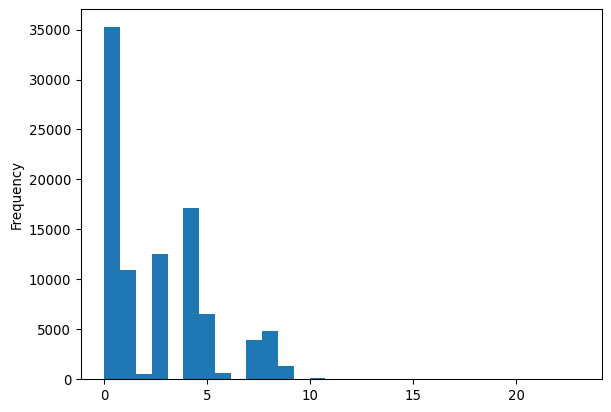

In [43]:
probs = df.isnull().sum(axis=1)
print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=30) # Oooooooh, check out what we can do with a series!

Looking at this histogram, I would think about dropping rows missing
more than about 5 values on the basis that they are the ones that are
most likely be problematic. We can use the index from `probs` to select
out the rows we want to inspect from the main data frame.

Here’s another bit of code that bears unpacking:

In [44]:
print(f"df contains {df.shape[0]:,} rows.")
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)
print(f"df contains {df.shape[0]:,} rows.")

df contains 93,481 rows.
df contains 82,856 rows.

1.  `probs > 5`: this selects only those rows in the ‘probs’ series
    whose value is greater than 5
2.  `probs[...].index` returns the index values from the Series, which
    we will then pass to the `drop` command.
3.  `df.drop(..., inplace=True)` will then drop the rows selected by
    `probs[probs>5].index`.

## 8. Fixing Data Types

When we fix the data types we are undertaking a kind of data
‘profiling’: working out what kind of data we are working with and how
it should be represented at the level of observations and columns. There
are *huge* benefits to computer memory and diskspace usage to profiling
and, consequently, huge gains to be made in the speed of data analysis.

If you want to challenge yourself, then I’d suggest trying to work out
how to adapt what we saw in previous weeks using the data type
dictionary to map column names to column types; however, a more
straightforward way to do this is to create different for loops for
each.

### 8.1 Profiling (Not Supported)

> **Difficulty: Low.**

The Pandas Profiling tool (rebranded a year or so back as
[ydata-profiling](https://github.com/ydataai/ydata-profiling)) offers an
alternative way of understanding what’s going on in your data. The
output [looks rather nice](https://docs.profiling.ydata.ai/) and you
might be tempted to ask why we didn’t use this straight away on the full
data set – well, if you really want to know, see what happens when you
profile all 70,000-odd rows and 70-odd columns in the raw data frame… in
effect: while it’s ‘nice to have’, the likelihood of crashing your
computer increases significantly and it’s a bit of a tangent, so that’s
why it’s no longer included in the Podman image.

If you *do* want to explore this then you’ll need to install the
library, and **this is a good chance to look at how to install software
on another machine**:

In [45]:
from ydata_profiling import ProfileReport

### 8.2 Managing Memory

> **Difficulty: Low.**

So as to *why* you’d want to fix your data types, there are two
reasons: 1) to ensure that you can make the *most* of your data; 2) to
ensure that it takes up as little space as possible in memory. Some
simple examples:

-   A column containing only the strings `'True'` (4 bytes) and
    `'False'` (5 bytes) will take up vastly more space than a column
    containing only `True` and `False` (1 **bit** each).
-   A column containing only `'Red'`, `'Green'`, and `'Blue'` (3, 5, and
    4 bytes each respectively) will take up much more space that a
    column where we use the numbers `1, 2, 3` to represent these values
    and have a map that tells us `1==Red`, `2==Blue`, and `3==Green`.

Let’s test this idea out before looking more closely at how to convert
each type of data:

In [46]:
# String type memory usage
rtm = df.room_type.memory_usage(deep=True) 
# Categorical type memory usage
ctm = df.room_type.astype('category').memory_usage(deep=True) 

print(f"The raw memory usage of `room_type` is {rtm/1024:,.0f} Kb.")
print(f"The categorical memory usage of `room_type` is {ctm/1024:,.0f} Kb.")
print(f"That's {(ctm/rtm)*100:.0f}% of the original!")

The raw memory usage of `room_type` is 5,741 Kb.
The categorical memory usage of `room_type` is 729 Kb.
That's 13% of the original!

In [47]:
# String type memory usage
shm = df.host_is_superhost.memory_usage(deep=True) 
# Boolean type memory usage
bhm = df.host_is_superhost.replace({'f':False, 't':True}).astype('bool').memory_usage(deep=True) 

print(f"The raw memory usage of `host_is_superhost` is {shm/1024:,.0f} Kb.")
print(f"The boolean memory usage of `host_is_superhost` is {bhm/1024:,.0f} Kb.")
print(f"That's {(bhm/shm)*100:.0f}% of the original!")

The raw memory usage of `host_is_superhost` is 4,686 Kb.
The boolean memory usage of `host_is_superhost` is 728 Kb.
That's 16% of the original!

### 8.3 Boolean Values

> **Difficulty: Moderate.**

Let’s start with columns that are likely to be boolean:

In [48]:
bools = ['host_is_superhost']
df.sample(5, random_state=43)[bools]

Here we have to `map` ‘t’ to True and ‘f’ to False *before* converting
the column to a boolean type. If you simply tried to replace them with
the strings ‘True’ and ‘False’, then any string that is not `None` would
convert to a `True` boolean.

In [49]:
# This approach requires us to map 't' 
# and 'f' to True and False
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost

In [50]:
df.sample(5, random_state=43)[bools]

### 8.4 Dates

> **Difficulty: Hard.**

I’ve found dates to be particularly challenging, though pandas has
*tried* to make this process less painful than it was a few years ago.
What can be particularly frustrating is if *one* row has a non-sensical
date value (e.g. a `t`, as happened in 2019/20) then the entire type
conversion will fail. When that happens, pandas is not great about
communicating where the problem occurred and I had to work it out by
trying to convert *parts* of each series (using `.iloc`) to the datetime
type until I had a block that failed. I then knew that I could narrow
this down further using integer location indexing.

In [51]:
dates = ['last_scraped','host_since','first_review','last_review']

print(f"Currently {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

Currently host_since is of type 'object' 


In [52]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review

In [53]:
df.sample(5, random_state=43)[dates]

Of course, it’s not actually clear there what has changed! But if you
dig a little more deeply:

In [54]:
print(f"Now {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=45)[dates[1]].dt.strftime('%A %B %d, %Y')
# Try some other formats!

Now host_since is of type 'datetime64[ns]' 


90719      Tuesday August 25, 2015
86895      Thursday April 04, 2024
23856    Tuesday February 06, 2024
11538      Monday October 14, 2019
21073    Tuesday December 03, 2019
Name: host_since, dtype: object

In that line of code we:

-   Took a random sample (setting the state to 45),
-   Took the second column from the dates list (`dates[1]`),
-   Used the *date* ‘accessor method’ (`.dt`),
-   And called `string format time` with the format `%A %B %d, %Y` (Full
    Day of Week, Month Name, Date, 4-digit Year)

### 8.5 Categories

> **Difficulty: Moderate.**

We know that these are likely to be categories because there’d be no
other way to allow users to effectively search Airbnb.

In [55]:
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]

Currently room_type is of type 'object' 


This next piece of code is quite useful for grouping and counting
operations: we are counting the occurences of each unique value in part
particular column or combination of columns:

``` python
df[cats[0]].value_counts()
```

    property_type
    Entire rental unit              34289
    Private room in rental unit     11681
    Private room in home             9833
    Entire condo                     8412
    Entire home                      7437
                                    ...  
    Religious building                  1
    Shared room in villa                1
    Minsu                               1
    Private room in nature lodge        1
    Private room in floor               1
    Name: count, Length: 94, dtype: int64

``` python
df[cats[1]].value_counts()
```

    room_type
    Entire home/apt    54157
    Private room       28197
    Shared room          327
    Hotel room           175
    Name: count, dtype: int64

> **Tip**
>
> One column has *many* different values (including Campers/RVs and
> Yurts!), the other has just four. If I were looking to conduct
> research I’d probably *start* with the `room_type` column since I may
> not care about hotels and therefore never even need to decide whether
> I care about boutique ones!

In [58]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type

In [59]:
print(f"Now {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
print(df[cats[1]].cat.categories.values)

Now room_type is of type 'category' 

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']

In [60]:
df.sample(5, random_state=42)[cats]

### 8.6 Dealing with Strings

> **Difficulty: Hard.**

We’ll have to put some more work into dealing with the description and
other ‘free-from’ text fields later in the term, but for now let’s just
deal with a straightforward one: price!

In [61]:
money = ['price']
df.sample(5, random_state=42)[money]

**You will get an error when you run the next code block**, that’s
because I want you to do a little thinking about how to extend the code
to fix the data. You’ve already got the code you need to fix it, you
just need to do a bit of thinking about ‘method chaining’!

In [62]:
for m in money:
    print(f"Converting {m}")
    try:
        df[m] = df[m].str.replace('$','', regex=False).astype('float')
    except ValueError as e:
        print(f"    xxxx Unable to convert {m} to float xxxx")
        print(e)

Converting price
    xxxx Unable to convert price to float xxxx
could not convert string to float: '1,000.00'

Look closely at the error and then think about what you need to add to
the code below:

> **Note**
>
> For now don’t worry about what `regex=False` means. It will all make
> sense when we get to *dealing with text*.

##### 8.6.0.1 Question

In [ ]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(??).astype('float')

In [65]:
df.sample(5, random_state=42)[money]

And here’s a final thing to note that looks… a little odd:

In [66]:
df.sort_values(by='price', ascending=False).head(5)[['id','name','price','minimum_nights']]

### 8.7 Dealing with Integers

> **Difficulty: Hard.**

This is the issue that made me abandon the idea of making you clean the
data yourselves. Although *floats* have no issues with `np.nan` in the
Series, by default there are no numpy integer arrays that can cope with
NaNs. This was such a major issue for Pandas that they’ve actually
created their *own* data type that *does* support NaN values in integer
columns. There are a lot of integer columns, but only one of them seems
to be a problem.

In [67]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365

So we convert the column but using a `try / except` approach that allows
to trap `ValueError` exceptions triggered by the presence of NaNs in the
column. The following code tells us that there are just eight of these
in the 10k sample, but they’re enough to cause the code to fail if you
don’t trap them. The alternatives would be to: a) drop those rows; or b)
leave the data as floats. For some reason the latter offends my sense of
order, and the former feels like avoiding the problem rather than
dealing with it.

In [68]:
df.beds.isna().value_counts()

beds
False    60769
True     22087
Name: count, dtype: int64

### 8.8 Validation

> **Difficulty: Low.**

Ordinarily, at this point I would then output information to confirm
that all of the opeations I *think* I’ve undertaken were correctly
applied.

In [69]:
df.info()

### 8.9 Saving

Also at this point I would save a copy of the cleaned data, though I
would only consider this data *partially* cleaned since we’ve not made
it any further than just ensuring that each column is in an appropriate
format and that some particularly problematic rows have been dropped!

In [70]:
csv_out = Path(f'data/clean/{path.name}')
pq_out  = Path(f'data/clean/{path.name.replace('.csv.gz','.parquet')}')

if not csv_out.parent.exists():
    print(f"Creating {csv_out.parent}")
    csv_out.parent.mkdir(parents=True, exist_ok=True)
    
df.to_csv(csv_out, index=False)
df.to_parquet(pq_out, index=False)
print(f"Saved {df.shape[0]:,} rows of {df.shape[1]:,} columns to {csv_out.resolve()}")
print("Done.")

Saved 82,856 rows of 32 columns to /home/jovyan/work/practicals/data/clean/20250615-London-listings.csv.gz
Done.

We’ll shortly begin to look at the `parquet` file format because it’s
fast, it preserves data types, it’s compressed, and it will avoid the
kinds of the problems that come up when you move to/from CSV as a
default; however, for now let’s keep working with what we understand.

## 9. Selection using Criteria

So far we’ve been taking primarily a row and column view of the data,
now we want to think more formally about selecting ranges from within
the data set…

### 9.1 Selecting using Data Types

> **Difficulty: Low.**

If we wanted to filter in/out certain columns pandas can do that! Let’s
try for floats and ints (*hint*: these are 64-bit data types).

##### 9.1.0.1 Question

In [ ]:
df.select_dtypes(include=[??])

### 9.2 Selecting using Conditions

> **Difficulty: Hard.**

Conditional selection is usally done as a combination of the selection
approaches above in combination with conditionals. So to try to select
only the `Entire home/apt` room type we are testing for cases where the
`room_type` equals our target term (`Entire home/apt`):

##### 9.2.0.1 Question

In [ ]:
df[df.??=='??']['property_type'].value_counts().head(10)

Your output should be:

In [ ]:
property_type
Entire rental unit           34289
Entire condo                  8412
Entire home                   7437
Entire serviced apartment     1653
Entire townhouse              1041
Entire loft                    352
Entire guesthouse              217
Name: count, dtype: int64

### 9.3 Arbitrary Selection Criteria

> **Difficulty: Moderate, if the previous section made sense to you.**

OK, now let’s look for the Entire home/apt listings that cost more than
the average price of all listings… to do *that* let’s get a sense of
where the mean and median value fall:

##### 9.3.0.1 Question

In [ ]:
print(f"The mean price is ${df.price.??():0.2f}")
print(f"The median price is ${df.price.??():0.2f}")

You should get:

-   The mean price is \$209.56
-   The median price is \$137.00

You should see that the mean is higher than the median price but both
are *very* roughly plausible values. Given your understanding of
distributions from, say, Quantitative Methods, what can you say about
the pricing distribution of Airbnb units?

You might want to have a [look at the
documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series):
it’s rather a long list, but most of your descriptive stats are on that
page in the [Cumulative / Descriptive
Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats)
section, and there’s also lots of information about methods for
[strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)
and [categorical
data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

#### 9.3.1 Filtering: it’s ‘logical’

So we want to take `Entire home/apt` and filter the data set *together
with* the price per night from the `price` column. For that, let’s use
the mean price/night of \$209.56. *Note*: this is totally arbitrary.

##### 9.3.1.1 Question

So here we want to filter on two values in the data set using `&`:

In [ ]:
pricey = df[
    (??) & 
    (df.price>df.price.??)
]
print(f"Selected {pricey.shape[0]:,} rows")

You should get 16,257 rows.

In the code above we see two things:

1.  The use of the bitwise `&` (it’s *not* the same as `and` and you
    should recall our work with the `bitarray` earlier in the term).
2.  The fact that you need parentheses around the selection in order to
    make the the `&` work.

### 9.4 Selection with an Aggregate

> **Difficulty: Low.**

Let’s find the cheapest and most expensive listings using `min` and
`max` methods:

##### 9.4.0.1 Question

Least expensive:

In [ ]:
df[df.price==df.price.??()][['price','id','listing_url','room_type','description']]

Most expensive:

In [ ]:
df[df.price==df.price.??()][['price','id','listing_url','room_type','description']]

You should see one or more units priced at exceedingly high levels… and
here’s a way to see a few more of these budget-busting options.

In [86]:
df.sort_values(by='price', ascending=False).head(3)[
    ['price','listing_url','room_type','description']
]

> **Stop: Ask yourself if the result is *plausible*.**

##### 9.4.0.2 Question

What do you make of this result?

### 9.5 Selection with a Range

> **Difficulty: Moderate**

Perhaps we aren’t just looking for extremes… how about all of the
properties falling within the middle of the distribution? We can ask for
any abitrary quantile we like, so let’s go with the 25th and 75th
percentile to get the middle 50% of the data. Google how to get
percentiles from pandas.

##### 9.5.0.1 Question

In [ ]:
dfr = df[ 
            (df.price > df.price.quantile(??)) & 
            (df.price < df.price.quantile(??)) ]

print(f"Lower Quartile: {df.price.quantile(??):>6.2f}")
print(f"Upper Quartile: {df.price.quantile(??):>6.2f}")
print()
print(f"Range selected contains {dfr.shape[0]:,} rows.")
print(f"Minimum price: {dfr.price.??():>6.2f}")
print(f"Maximum price: {dfr.price.??():>6.2f}")

That example contains a few things to which you need to pay attention:

1.  *Again* you can see that, with mutiple selections, we had to put
    parentheses around each one – this forces Python to…
2.  Process the `&` (bit-wise AND) that asks pandas to “Find all the
    rows where condition 1 *AND* condition 2 are both `True`”. So it
    calculates the `True`/`False` for the left side and the
    `True`/`False` for the right side of the `&`, and then combines
    them.

I find this parentheses business annoying and frequently get an error
when I forget to add them, but I’m guessing it’s tied to operator
precedence and how the various operations are interpreted by Python.

## 10. Deriving New Variables

> **Difficulty: 🤯**

Let’s try calculating several derived measures of distribution for the
price… these deliberately demonstrate different ways of handling this
process (and notice also the little call to `apply` that can perform
additional tasks).

#### 10.0.1 The *z*-Score

The z-score is given by $z = (x - \bar{x})/\sigma$.

##### 10.0.1.1 Question

In [ ]:
df['z'] = (df.?? - df.??.??()) / df.??.??()
df.z.describe().apply(lambda x: f"{x:5.5f}")

#### 10.0.2 Inter-Quartile Standardisation

The IQR-standardised score is given by $i = (x - Q_{1})/(Q_{3} - Q_{1})$

##### 10.0.2.1 Question

In [ ]:
df['iqs'] = (df.price - ??)/(??-??)
df.iqs.describe().apply(lambda x: f"{x:5.5f}")

#### 10.0.3 Log-Normalisation

The natural log of the price is gven by $ln(x)$

##### 10.0.3.1 Question

In [ ]:
df['lnprice'] = np.log(??)
df.lnprice.describe().apply(lambda x: f"{x:5.5f}")

## 11. Quick (and Dirty) Plotting

Although we’ve spent a lot of time grappling with pandas code and
cleaning/filtering/selecting data, one of the first things we should
really do when exploring a new dataset is plot (aka graph) the data.
We’ve left plotting until late in this practical so that we could see
some other basic attributes of how pandas stores data. We’ll look at
plotting and exploratory data analyses in much more detail across the
following weeks, including using packages other than pandas.

For now, let’s look at the basic plotting functionality pandas
provides - in conjunctions with the online documentation for both
[DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
and
[Series](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).
There are also examples of all [the different types of plots pandas can
produce](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

> **MacOS plotting *without* Podman**
>
> MacOS users who are *not* using Podman will need to do certain things
> in a specific order at the start of any notebook in order to show maps
> or graphs. Please make a copy of the following code for any notebook
> that you create and make it the *first* code that you run in the
> notebook…
>
> ``` python
> # Needed on a Mac
> import matplotlib as mpl
> mpl.use('TkAgg')
> %matplotlib inline
> import matplotlib.pyplot as plt
> ```

#### 11.0.1 Histograms

> **Difficulty: Low**

First, let’s see some of the ways we could visualise the distribution of
the `Series` in the dataset:

In [96]:
df.price.plot.hist() # histogram

If the code worked properly you should have just created a standard
[histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html)
plot (if you can’t see one, ask for help). However, a basic problem here
may be the range of the data: if your maximum price is much more than
£5,000 then you’ll find the majority of your data plotted in one bar,
which isn’t very helpful.

You can filter the data *and* pass in some simple options to improve the
plotting:

In [97]:
# Notice the ';' here to suppress `<AxesSubplot...>`
# That information doesn't *always* appear, but whenever
# you have unwanted textual output above your plot just
# add a ';' on the end of the line of code!
df[df.price < 1000].price.plot.hist(bins=50); 

#### 11.0.2 KDE Plots

> **Difficulty: Low**

Similarly, we can produce a [Kernel Density Estimate
plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html).
This time, instead of dropping data just before calling `plot` we’re
going to modify the *limits* of the x-axis using `xlim`:

##### 11.0.2.1 Question

Look for information about using `xlim`:

In [ ]:
df.price.plot.kde(xlim=(??)); #kernel density estimate plot

Kind of handy, no? These aren’t the *best* looking plots, but they are
all being generated on-the-fly for you by pandas with no more than a
cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all
just method calls, many of them take optional parameters to change the
colour, the notation (scientific or not), and other options. For
example, many of the documentation pages linked to above are rather
brief, but include a link to [the general options that can be applied to
all
`Series.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)
calls.

This is why we like pandas: it allows us to be *constructively lazy*. We
don’t need to know *how* a draw a KDE plot (though it always helps if
you don’t see what you expected), we just need to know that pandas
provides a method that will do it for you. And *that* is why it’s always
worth having a [look at the
documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

#### 11.0.3 A Slight Case of Over-Plotting

Generally, Jupyter is clever enough to overlay plots one on top of the
other if you call them all in the same cell. We’ll see ways to gain more
control later, but this is still a good start! Note that here we also
need to get rid of the `-inf` values from rows that had a price of £0.

> **Bug Alert**
>
> The more we use pandas to sort and filter data the more you will start
> to see a `SettingWithCopyWarning`. This happens because of an
> interaction between how Pandas works and how Python works: when you
> are working with a very large data set you don’t want to make a ‘deep
> copy’ of the data structure every time you make a change to the data.
> Instead, you get a ‘view’ into the data using a reference, which is a
> just a lightweight shortcut. So what happens when you try to modify
> that lightweight copy? Well, if you want to drop rows or columns then
> you either want to make a `copy()` at that point, or you will have to
> accept the warning *and* the computational risks that go with it.

In [100]:
# Calling copy() ensures the index is updated
# and note that all subsequent plots will have
# these £0 rows removed!
df = df[df.price > 0].copy() 
df.z.plot.kde(xlim=[-2, 10])
df.iqs.plot.kde(xlim=[-2, 10])
df.lnprice.plot.kde();

#### 11.0.4 Boxplots

> **Difficulty: Low**

A standard
[boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html):

In [101]:
df.lnprice.plot.box(figsize=(4, 8));

#### 11.0.5 Scatterplots

> **Difficulty: Low**

We can also plot two variables in a [scatter
plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter)
by applying a plot method to the `DataFrame` (not an individual
`Series`):

In [102]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))

Note how the code above has the form `DataFrame.plot.<plot type>`, not
`DataFrame.Series.plot.<plot type>` as in the prior plots. Think about
why this then means we need the `x` and `y` arguments.

Looking at the plot produced, it’s hard to see where the high values
are, so we might want to think about ways that we could make it easier
to spot the big numbers… We could, for instance, also vary the size of
the point in a plot by some variable, but why does the following not
really work?

In [103]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='viridis', figsize=(15,10))

And we can plot subsets of our data without creating a new object. See
if you can work out what the following code is doing that is different
from the last plot:

In [104]:
df[df.price > df.price.quantile(0.90)].plot.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=8)

#### 11.0.6 Hex Bin Plots

> **Difficulty: Low**

And pandas allows us to create ‘less standard’ plots, like a [hex bin
plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

In [105]:
df.plot.hexbin(x='longitude', y='latitude', gridsize=50, figsize=(10,7))

That’s just a taste of what the basic plotting functionality of pandas
can do. Feel free to explore more yourself and we’ll also see [the
seaborn package](http://seaborn.pydata.org/index.html) later.

## 12. Credits!

##### 12.0.0.1 License

These teaching materials are licensed under a mix of [The MIT
License](https://opensource.org/licenses/mit-license.php) and the
[Creative Commons Attribution-NonCommercial-ShareAlike 4.0
license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

##### 12.0.0.2 Acknowledgements:

Supported by the [Royal Geographical
Society](https://www.rgs.org/HomePage.htm) (with the Institute of
British Geographers) with a Ray Y Gildea Jr Award.

##### 12.0.0.3 Potential Dependencies:

This notebook may depend on the following libraries: pandas, matplotlib